# Simple Harmonic Oscillator Energy Eigenstates in the Position Representation

## Energy eigenfunctions in position

In [33]:
# Numpy
import numpy as np

# Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt

# Function that gives Hermite polynomials
from scipy.special import eval_hermite as hermite

# Better plots in the notebook
%matplotlib notebook 

# A function for computing the magnitude squared of complex numbers
mag_squared = lambda a: (np.conj(a)*a).real

In [34]:
x = np.linspace(-10,10,1000) # An array of position values to use for plotting

<IPython.core.display.Javascript object>


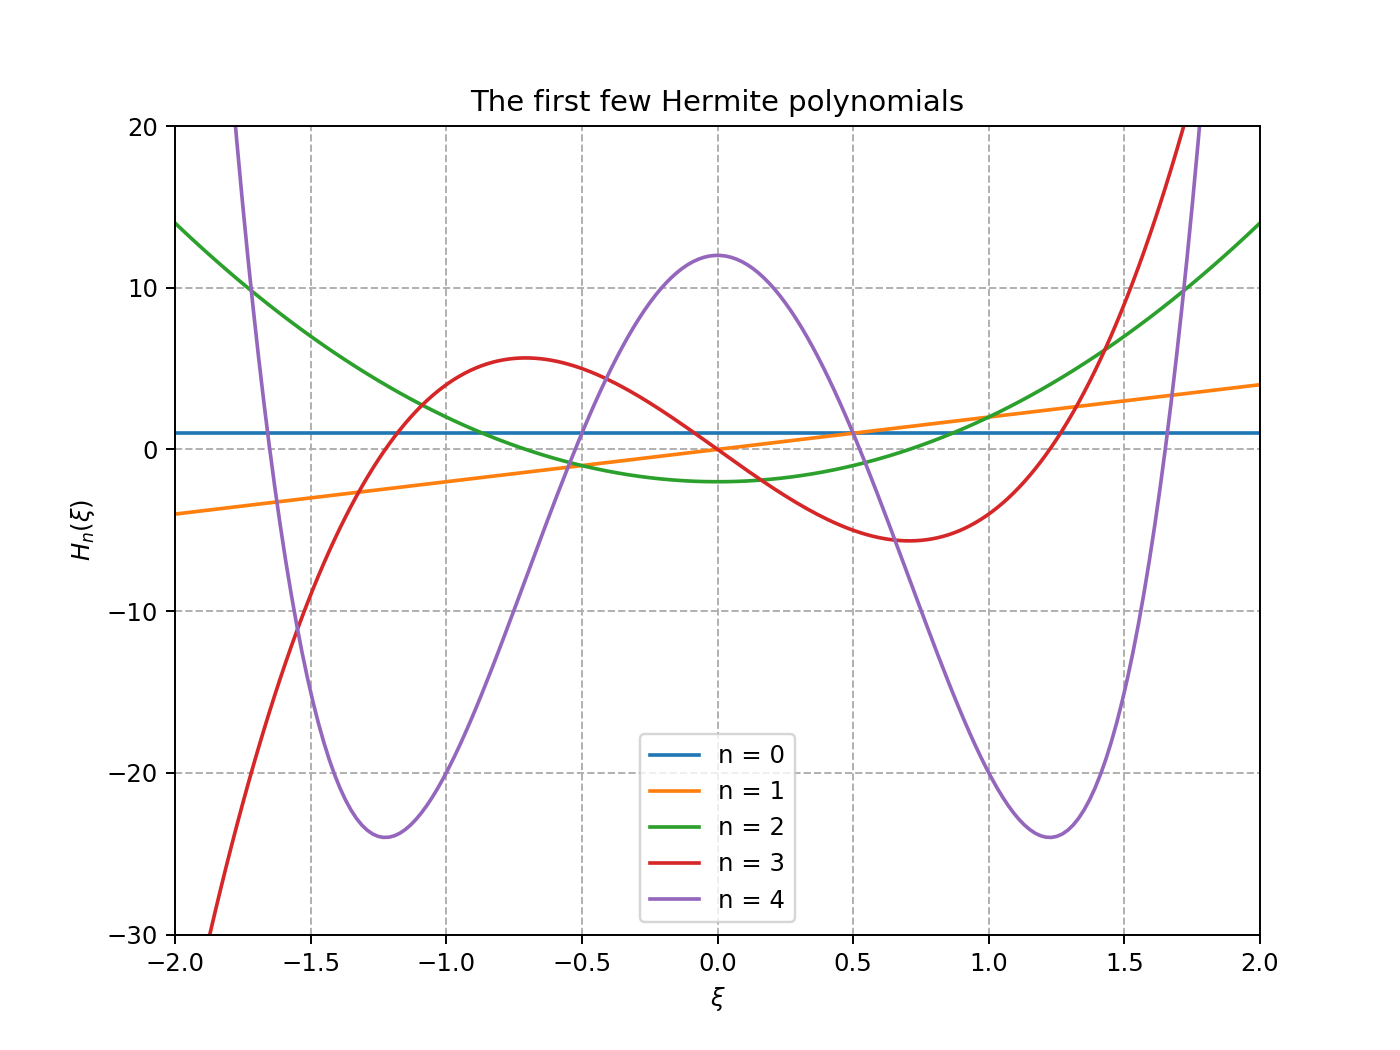

In [35]:
f,ax = plt.subplots(figsize = (8,6))
[ax.plot(x,hermite(n,x),label="n = {}".format(n)) for n in range(5)]

ax.set_ylim([-30,20])
ax.set_xlim([-2,2])
ax.grid(True,which='both',linestyle='--')
ax.set_xlabel(r'$\xi$')
ax.set_ylabel(r'$H_n(\xi)$')
ax.set_title("The first few Hermite polynomials")

plt.legend()

# Hermite Polynomials

### $$ H_n(\xi) = (-1)^ne^{-\xi^2/2}\frac{d^n}{d\xi^n}e^{-\xi^2/2} = \left(2x-\frac{d}{dx} \right)^n \times 1$$

Note that these are "physicist's" Hermite polynomials (there is also a "probabilist's" version) Hermite polynomials form a complete, orthonormal set of functions. The first few are:

$H_0(\xi) = 1$

$H_1(\xi)=2\xi$

$H_2(\xi)=4\xi^2-2$

$H_3(\xi)=8\xi^3-3x$

$H_4(\xi)=16\xi^4-48x^2+12$

# SHO Energy Eigenfunctions in the Position Representation

### $\phi_n(\xi) = \left(\frac{m\omega}{\pi \hbar}\right)^{1/4} \frac{1}{\sqrt{2^nn!}}H_n(\xi)e^{-\xi^2/2}$

### where $\xi$ is a dimensionless, scaled position coordinate $\xi = \sqrt{\frac{m\omega}{\hbar}}x$

In [28]:
# Function to get the nth energy eigenfunction
def psi_e(x,n):
    psi = hermite(n,x)*np.exp(-x**2/2) # Compute the un-normalized wavefunction for nth
    psi = psi/np.sqrt(np.sum(mag_squared(psi))) # Normalize it numerically
    
    return psi

<IPython.core.display.Javascript object>


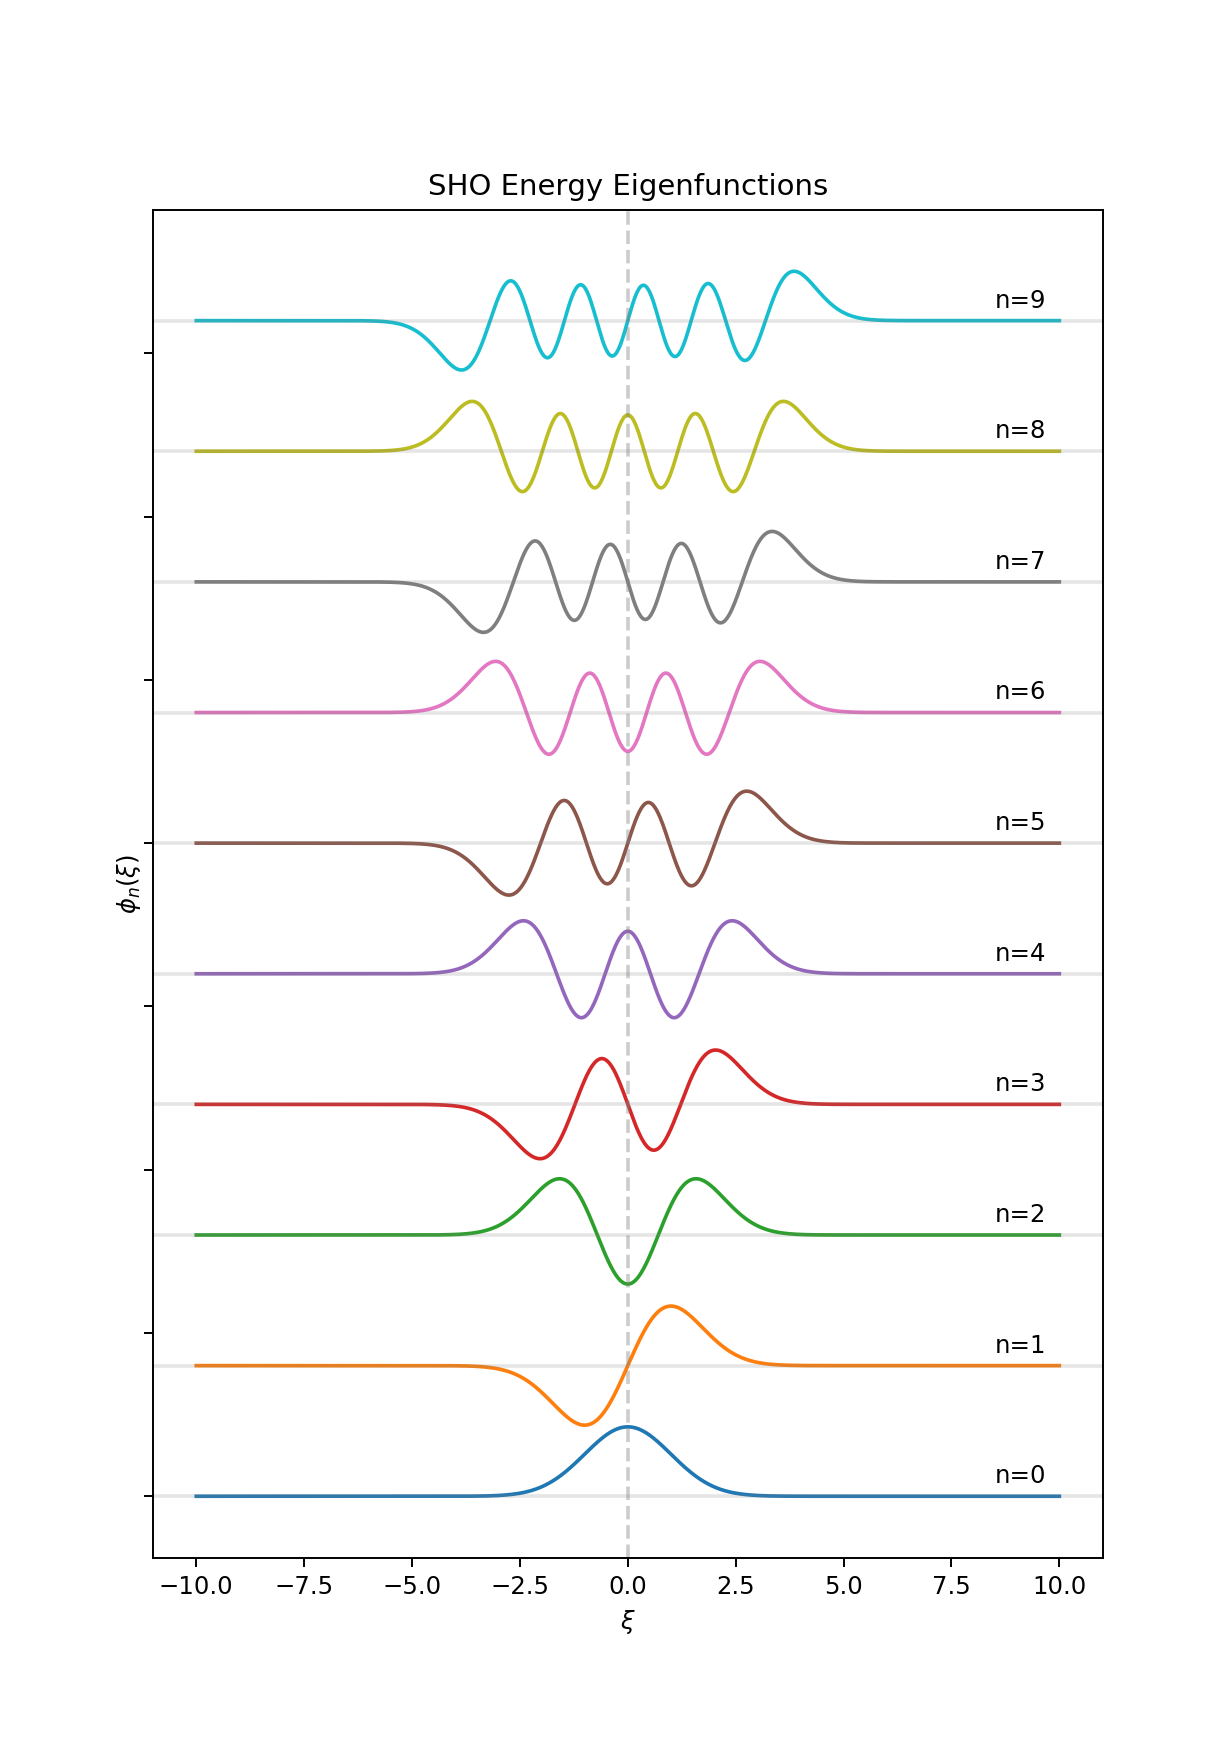

In [36]:
# plot the first few energy eigenfunctions

f2,ax2 = plt.subplots(figsize=(7,10))

# Number of eigenfunctions to plot (0 to nr-1)
nr = 10

# Draw each eigenfunction vertically displaced for clearer viewing
[ax2.plot(x,psi_e(x,n) + n/5,label="n= {}".format(n)) for n in range(nr)]

# Draw an "x-axis" for each vertically displaced wavefunction
[ax2.axhline(n/5,color='gray',alpha=0.2) for n in range(nr)]

# Draw x=0 vertical axis
ax2.axvline(0.0 ,color='gray',linestyle='dashed',alpha=0.4)

# Draw Labels
ax2.set_xlabel(r'$\xi$')
ax2.set_ylabel(r'$\phi_n(\xi)$')
ax2.set_title("SHO Energy Eigenfunctions")
ax2.tick_params(labelleft=False)

# Label each wavefunction
[ax2.text(8.5,n/5+0.02,'n={}'.format(n)) for n in range(nr)];

## Discussion: What are some of interesting features of these energy eigenfunctions?

# Turning Points and the Classically Forbidden Region

Lets say you want to compare one of the Simple Harmonic Oscillator energy eigenstates to a classical Simple Harmonic Oscillator with the same energy. The classical version will oscillate back and forth between two extreme positions $\pm x_t$ called turning points.

At these classical turning points, the velocity of the oscillating particle is zero so all of the energy is potential energy.

$$E = \hbar \omega\left(n + \frac{1}{2}\right) = \frac{1}{2}m\omega^2x_t^2$$

$$x_t = \sqrt{\frac{2\hbar}{m\omega}\left(n+\frac{1}{2}\right)}$$

Converting to our dimensionless position coordinate $\xi_t = \sqrt{\frac{m\omega}{\hbar}}x_t$, we have:

$$\xi_t = \pm \sqrt{2\left(n+\frac{1}{2}\right)}$$

In [37]:
# This function returns the corresponding classical turning points for the nth energy eigenstate
def tp(n): 
    return np.sqrt(2*(n+1/2))

## Ground State

<IPython.core.display.Javascript object>


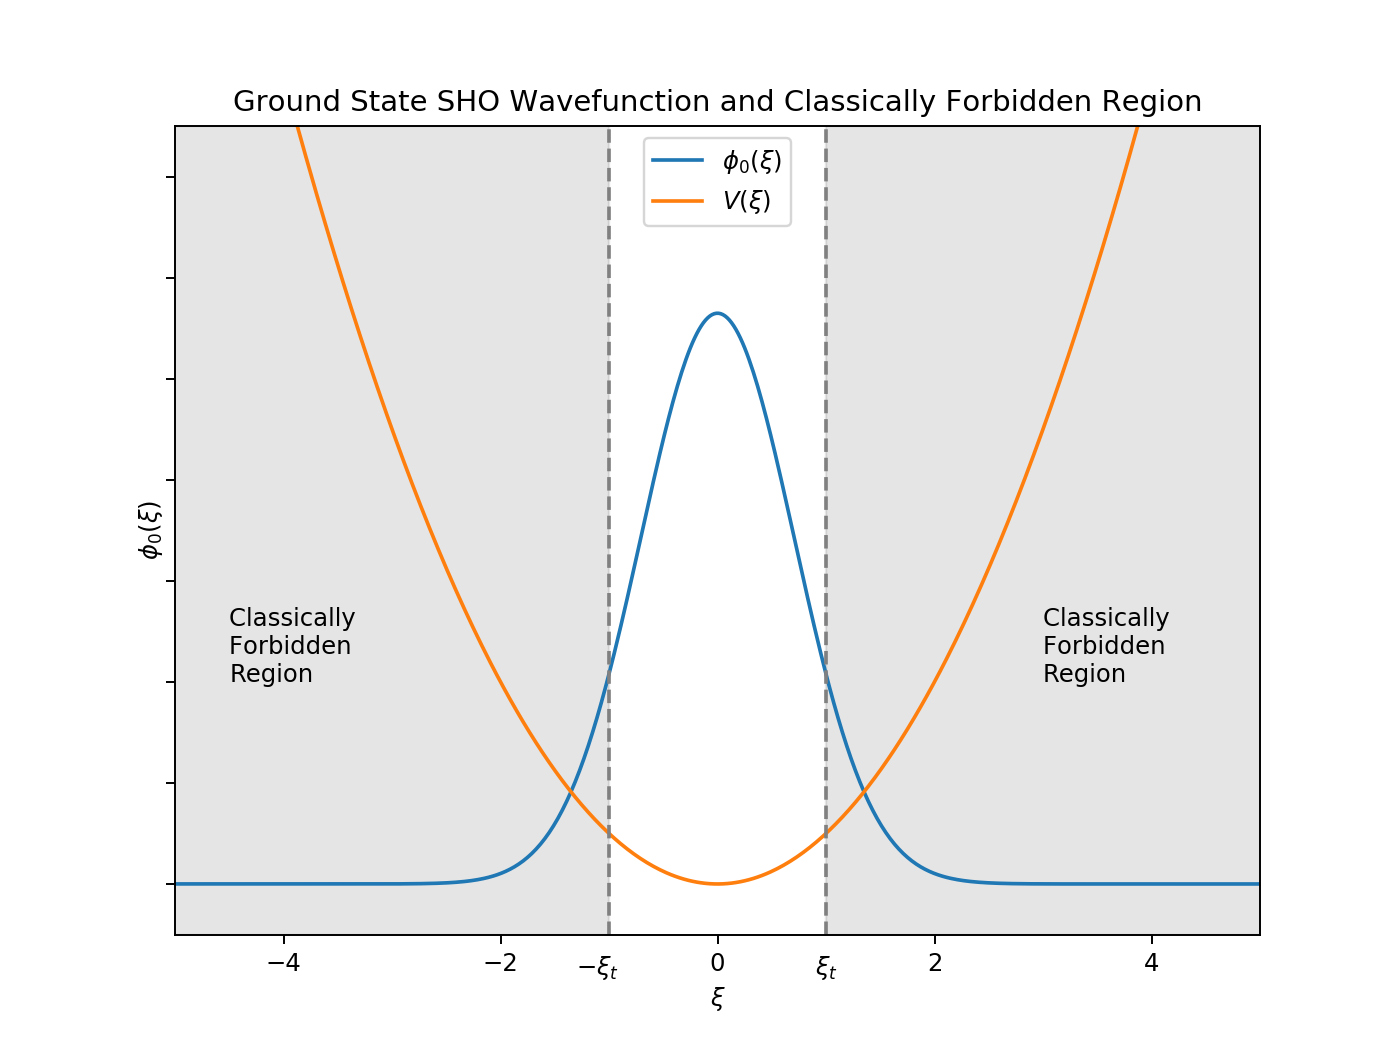

In [38]:
f3, ax3 = plt.subplots(figsize=(8,6))
ax3.plot(x, mag_squared(psi_e(x,0)),label=r'$\phi_0(\xi)$')
ax3.plot(x,0.001*x**2,label=r'$V(\xi)$')

ax3.axvline(-tp(0),color = 'gray',linestyle='dashed')
ax3.axvline(tp(0), color='gray',linestyle='dashed')
ax3.axvspan(-20,-tp(0),color='gray',alpha=0.2)
ax3.axvspan(tp(0),20,color='gray',alpha=0.2)


ax3.set_xlim([-5,5])
ax3.set_ylim([-0.001,0.015])
ax3.tick_params(labelleft=False)

ax3.set_xlabel(r'$\xi$')
ax3.set_ylabel(r'$\phi_0(\xi)$')

ax3.text(tp(0)-0.1, -.0018, r'$\xi_t$')
ax3.text(-tp(0)-0.3, -.0018, r'$-\xi_t$')

ax3.text(3,0.004,"Classically \nForbidden \nRegion")
ax3.text(-4.5,0.004,"Classically \nForbidden \nRegion")

ax3.set_title("Ground State SHO Wavefunction and Classically Forbidden Region")

plt.legend();

The ground state of the SHO is a Gaussian Function:

$\phi_0(\xi) \propto e^{-\xi^2/2}$ and the probability density is $P_0(\xi)=|\phi_0(\xi)|^2$

Gaussian functions can be written in a standard form

$G(\xi) \propto e^{-\xi^2/2\sigma^2}$ where $\sigma$ is the standard deviation of $G(\xi)$.

For $n=0$, The turning point $\xi_t = 1$ is also the standard deviation so $\sigma=1$. 68% of the ground state amplitude is therefore enclosed within the classically allowed (white) region. 

## Discussion

## How is the quantum SHO ground state similar to or different from a classical harmonic oscillator with the same energy?

# What happens when n becomes large? Lets try increasing n.

### Note I am plotting the probability distribution here to make viewing a little easier

<IPython.core.display.Javascript object>


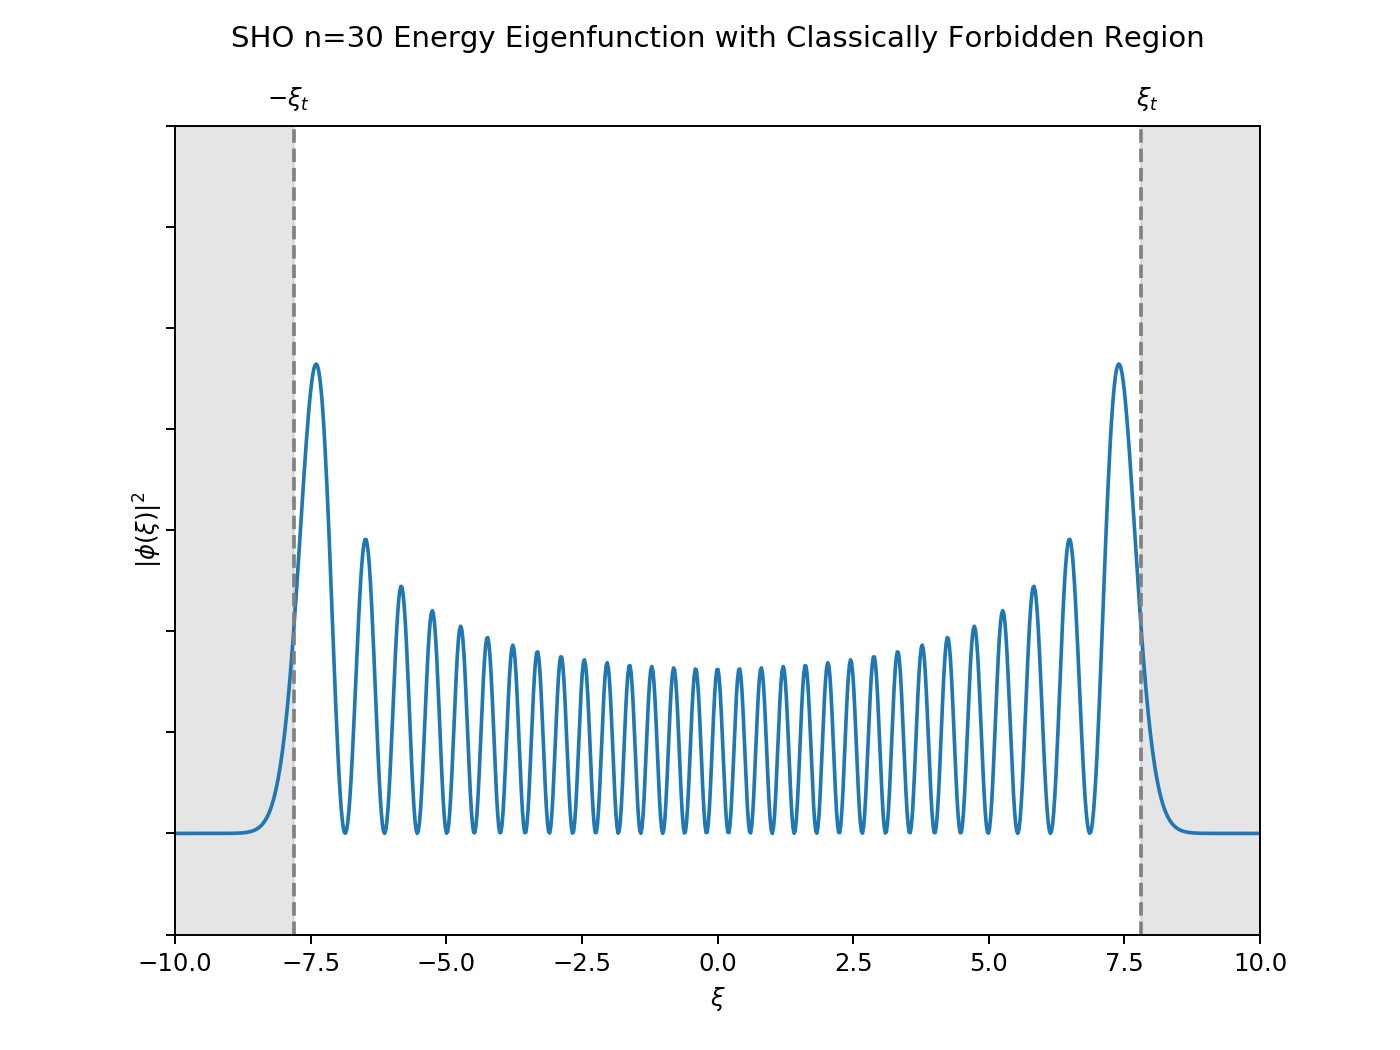

Text(0.5, 1.08, 'SHO n=30 Energy Eigenfunction with Classically Forbidden Region')

In [40]:
f4, ax4 = plt.subplots(figsize=(8,6))
q = 30

ax4.plot(x, mag_squared(psi_e(x,q)),label=r'$\phi_0(\xi)$')
#ax4.plot(x,0.001*x**2,label=r'$V(\xi)$')

ax4.axvline(-tp(q),color = 'gray',linestyle='dashed')
ax4.axvline(tp(q), color='gray',linestyle='dashed')
ax4.axvspan(-20,-tp(q),color='gray',alpha=0.2)
ax4.axvspan(tp(q),20,color='gray',alpha=0.2)


ax4.set_xlim([-10,10])
ax4.set_ylim([-0.001,0.007])
ax4.tick_params(labelleft=False)

ax4.set_xlabel(r'$\xi$')
ax4.set_ylabel(r'$|\phi(\xi)|^2$')

ax4.text(tp(q)-0.1, .0072, r'$\xi_t$')
ax4.text(-tp(q)-0.5, .0072, r'$-\xi_t$')

ax4.set_title("SHO n={} Energy Eigenfunction with Classically Forbidden Region".format(q),y=1.08)


## Discussion: 

## At higher energies, do energy eigenstates behave more like a classical simple harmonic oscillator? Why or why not?

# Superposition States

$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$
$\newcommand{\bra}[1]{\left\langle{#1}\right|}$
## $$\ket{\psi} = N\left[c_0\ket{0} + c_1\ket{1} + c_2\ket{2} + c_3\ket{3} + ...\right]$$

## and

## $$ \psi(x) = N\left[c_0\phi_0(x) + c_1\phi_1(x) + c_2\phi_2(x) + c_3\phi_3(x) ... \right] $$

<IPython.core.display.Javascript object>


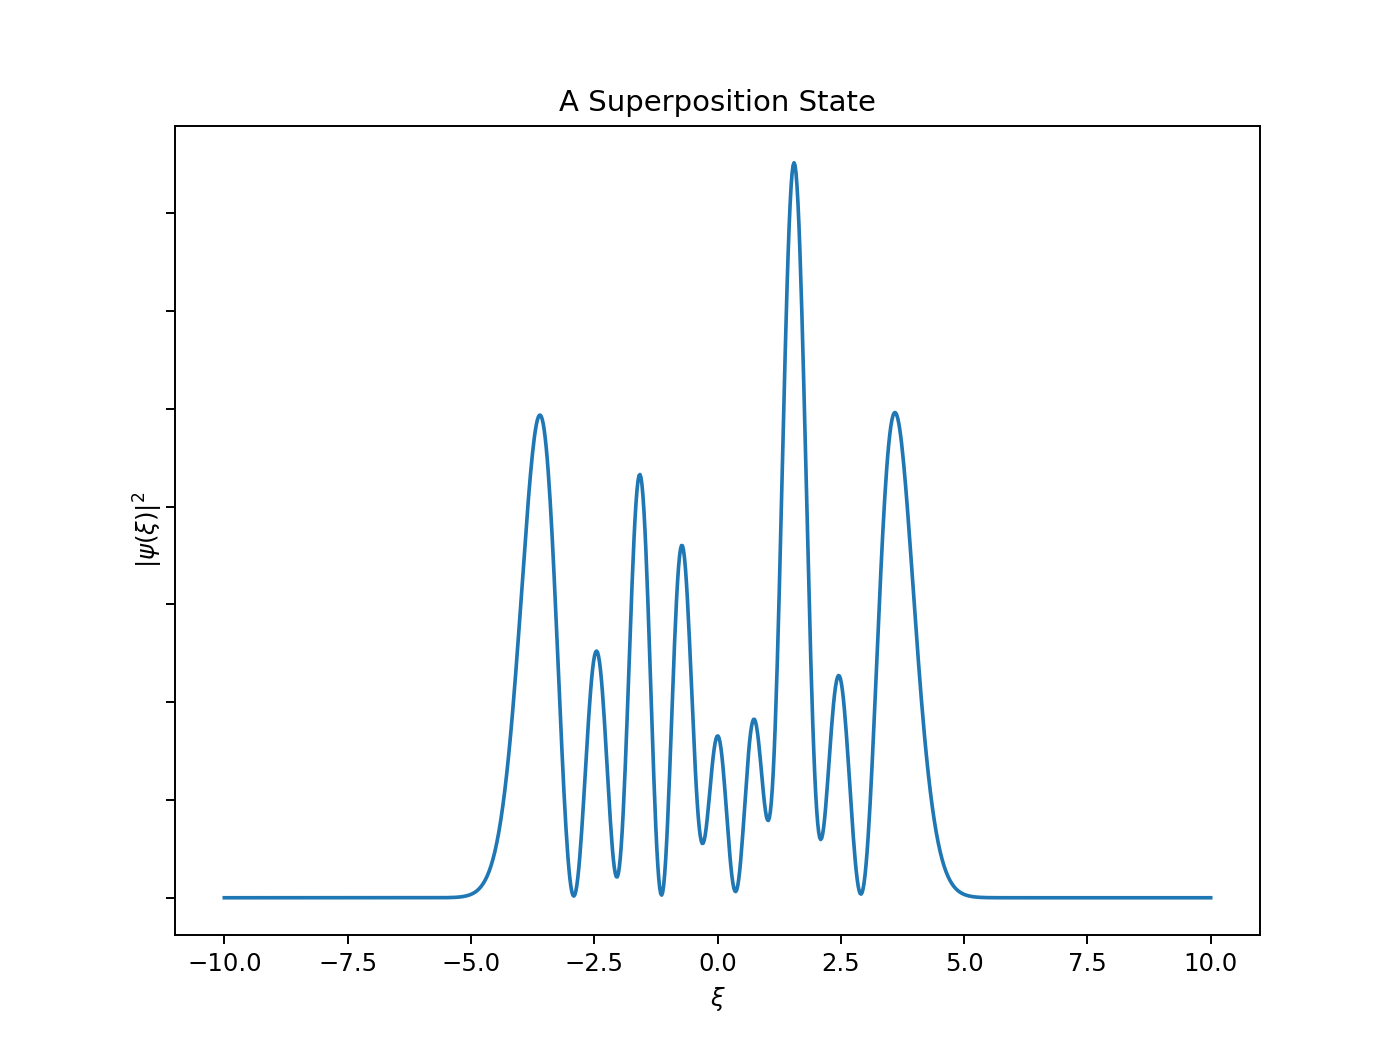

Text(0.5, 1.0, 'A Superposition State')

In [41]:
f5, ax5 = plt.subplots(figsize=(8,6))

# Make a superposition state
sup_state = psi_e(x,1) + 2*psi_e(x,2) + (3+4j)*psi_e(x,8)

# Renormalize it
sup_state = sup_state/np.sqrt(np.sum(mag_squared(sup_state)))


# Plot probability distribution
ax5.plot(x,mag_squared(sup_state))
ax5.tick_params(labelleft=False)
ax5.set_xlabel(r'$\xi$')
ax5.set_ylabel(r'$|\psi(\xi)|^2$')
ax5.set_title('A Superposition State')
